# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = "IAD32"
COLLABORATORS = "Marcin Słyś 408197, Michał Surówka 402299, Karol Śliwa 406441"

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 2/4)

In [19]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku recession_data_1.csv do tablicy `recession_data_1` w taki sposób, aby kolumna Country Code stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [20]:
# YOUR CODE HERE
recession_data_1 = pd.read_csv("recession_data_1.csv", index_col=0)
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.36,13.83,3.92,21.39,14.36,0.43
ALB,Albania,Europe,Lower middle,5.90,5.98,7.50,3.35,3.71,2.55
DZA,Algeria,Africa,Upper middle,1.70,3.40,2.40,1.60,3.60,2.90
ASM,American Samoa,Oceania,Upper middle,-4.10,1.85,-2.66,-4.17,0.30,0.00
AND,Andorra,Europe,High,4.81,1.55,-5.56,-5.30,-1.97,-0.01
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.50,4.01,1.22,-6.59,0.60,-8.20
PSE,West Bank and Gaza,Asia,Lower middle,-1.00,3.79,7.43,8.59,5.78,9.60
YEM,"Yemen, Rep.",Asia,Low,3.17,3.34,3.65,3.87,7.70,-12.71


### Zadnie 2: Prezentacja danych w formie tabelarycznej [10 pkt]

Przygotuj trzy tablice szeregów rodzielczych przedziałowych częstości wskaźnika GDP growth (annual %) dla poszczególnych lat.

Pierwsza tablica (`recession_table_1`) powinna zawierać szeregi skonstruowane w obarciu o całość danych.

Indeks:
 - Year (wszystkie lata)
 
Kolumny:
 - Kolejne przedziały (-25, -20]	(-20, -15] ... (35, 40] zdefiniowane jako IntervalIndex

Druga tablica (`recession_table_2`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego z rejonów geograficznych.

Indeks:
 - 1 poziomu: Region Name
 - 2 poziomu: Year (wszystkie lata dla każdego z rejonów)
 
Kolumny:
 - Kolejne przedziały (-25, -20], (-20, -15] ... (35, 40] zdefiniowane jako IntervalIndex

Trzecia tablica (`recession_table_3`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego stopnia zamożności.

Indeks:
 - 1 poziomu: Income Group
 - 2 poziomu: Year (wszystkie lata dla każdej z grup)
 
Kolumny:
 - Kolejne przedziały (-25, -20], (-20, -15] ... (35, 40] zdefiniowane jako IntervalIndex
 
Zapisz tablicę `recession_table_1` do pliku recession_table_1.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w tablicy liczby (za wyjątkiem lat i granic przedziałów w nagłówkach kolumn i wierszy) wyświetlały się z dokładnością do 2 miejsca po przecinku.

In [21]:
# Całość danych
# YOUR CODE HERE

intervals = pd.interval_range(start=-25, end=40, freq=5)
years = ['2006','2007','2008','2009','2010','2011']

recession_table_1 = pd.DataFrame(columns=intervals, index=years)

for year in years:
    temp = []
    for interval in intervals:
        temp.append(np.sum([val in interval for val in recession_data_1[year]]) / len(recession_data_1))
    temp2 = np.array(temp, dtype=float)
    recession_table_1.loc[[year]] = temp2

pd.options.display.float_format = '{:,.2f}'.format

recession_table_1 = recession_table_1.astype(float)
recession_table_1

,"(-25, -20]","(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]"
2006,0.00,0.00,0.00,0.01,0.08,0.36,0.47,0.07,0.01,0.00,0.01,0.01,0.00
2007,0.00,0.00,0.00,0.01,0.03,0.39,0.45,0.09,0.02,0.01,0.00,0.00,0.00
2008,0.00,0.01,0.01,0.03,0.13,0.45,0.32,0.05,0.01,0.00,0.00,0.00,0.00
2009,0.00,0.01,0.05,0.13,0.30,0.34,0.14,0.03,0.00,0.01,0.00,0.00,0.00
2010,0.00,0.00,0.00,0.03,0.09,0.45,0.36,0.06,0.01,0.01,0.01,0.00,0.00
2011,0.00,0.00,0.01,0.03,0.09,0.48,0.34,0.04,0.01,0.01,0.00,0.00,0.00


In [22]:
# Podział na rejony
# YOUR CODE HERE

intervals = pd.interval_range(start=-25, end=40, freq=5)
years = ['2006','2007','2008','2009','2010','2011']
regions = np.array(recession_data_1['Region Name'].unique())

index = pd.MultiIndex.from_product([regions, years])
recession_table_2 = pd.DataFrame(columns=intervals, index=index)
for region in regions:
    for year in years:
        temp = []
        for interval in intervals:
            region_data = recession_data_1[recession_data_1['Region Name'] == region]
            temp.append(np.sum([val in interval for val in region_data[year]]) / len(region_data))
        recession_table_2.loc[region, year] = temp

pd.options.display.float_format = '{:,.2f}'.format
recession_table_2 = recession_table_2.astype(float)
recession_table_2

(-25, -20]  (-20, -15]  (-15, -10]  (-10, -5]  (-5, 0]  (0, 5]   
Asia     2006        0.00        0.00        0.00       0.00     0.04    0.20  \
         2007        0.00        0.00        0.00       0.00     0.00    0.20   
         2008        0.00        0.00        0.00       0.00     0.04    0.43   
         2009        0.00        0.00        0.02       0.08     0.18    0.35   
         2010        0.00        0.00        0.00       0.00     0.04    0.20   
         2011        0.00        0.00        0.02       0.00     0.00    0.37   
Europe   2006        0.00        0.00        0.00       0.00     0.00    0.49   
         2007        0.00        0.00        0.00       0.00     0.00    0.42   
         2008        0.00        0.00        0.00       0.05     0.21    0.49   
         2009        0.00        0.02        0.12       0.33     0.44    0.09   
         2010        0.00        0.00        0.00       0.05     0.12    0.72   
         2011        0.00        0.00        0.02       0.02     0.09    0.70   
Africa   2006        0.00        0.00        0.00       0.00     0.08    0.32   
         2007        0.00        0.00        0.00       0.02     0.06    0.38   
         2008        0.00        0.02        0.00       0.02     0.06    0.40   
         2009        0.00        0.00        0.02       0.00     0.14    0.56   
         2010        0.00        0.00        0.00       0.02     0.00    0.38   
         2011        0.00        0.00        0.00       0.04     0.04    0.44   
Oceania  2006        0.00        0.00        0.00       0.06     0.44    0.38   
         2007        0.00        0.00        0.00       0.06     0.12    0.75   
         2008        0.00        0.00        0.06       0.12     0.38    0.31   
         2009        0.00        0.06        0.00       0.12     0.31    0.44   
         2010        0.00        0.00        0.00       0.00     0.12    0.62   
         2011        0.00        0.00        0.00       0.12     0.12    0.56   
Americas 2006        0.00        0.00        0.00       0.00     0.05    0.45   
         2007        0.00        0.00        0.00       0.00     0.03    0.47   
         2008        0.00        0.00        0.00       0.00     0.15    0.57   
         2009        0.00        0.00        0.05       0.15     0.47    0.30   
         2010        0.00        0.00        0.00       0.05     0.20    0.47   
         2011        0.00        0.00        0.00       0.03     0.23    0.42   

               (5, 10]  (10, 15]  (15, 20]  (20, 25]  (25, 30]  (30, 35]   
Asia     2006     0.55      0.14      0.00      0.00      0.04      0.02  \
         2007     0.53      0.20      0.04      0.02      0.00      0.00   
         2008     0.43      0.08      0.02      0.00      0.00      0.00   
         2009     0.27      0.08      0.00      0.02      0.00      0.00   
         2010     0.61      0.10      0.02      0.00      0.02      0.00   
         2011     0.51      0.06      0.02      0.02      0.00      0.00   
Europe   2006     0.49      0.02      0.00      0.00      0.00      0.00   
         2007     0.51      0.07      0.00      0.00      0.00      0.00   
         2008     0.23      0.02      0.00      0.00      0.00      0.00   
         2009     0.00      0.00      0.00      0.00      0.00      0.00   
         2010     0.12      0.00      0.00      0.00      0.00      0.00   
         2011     0.16      0.00      0.00      0.00      0.00      0.00   
Africa   2006     0.52      0.06      0.02      0.00      0.00      0.00   
         2007     0.44      0.06      0.04      0.00      0.00      0.00   
         2008     0.42      0.06      0.02      0.00      0.00      0.00   
         2009     0.24      0.04      0.00      0.00      0.00      0.00   
         2010     0.50      0.08      0.00      0.02      0.00      0.00   
         2011     0.42      0.06      0.00      0.00      0.00      0.00   
Oceania  2006     0.12      0.00      0.00      0.00      0

In [23]:
# Podział pod względem stopnia zamożności
# YOUR CODE HERE
intervals = pd.interval_range(start=-25, end=40, freq=5)
years = ['2006','2007','2008','2009','2010','2011']
groups = np.array(recession_data_1['Income Group'].unique())

index = pd.MultiIndex.from_product([groups, years])
recession_table_3 = pd.DataFrame(columns=intervals, index=index)

for group in groups:
    for year in years:
        temp = []
        for interval in intervals:
            group_data = recession_data_1[recession_data_1['Income Group'] == group]
            temp.append(np.sum([val in interval for val in group_data[year]]) / len(group_data))
        recession_table_3.loc[group, year] = temp

pd.options.display.float_format = '{:,.2f}'.format
recession_table_3 = recession_table_3.astype(float)
recession_table_3

(-25, -20]  (-20, -15]  (-15, -10]  (-10, -5]  (-5, 0]   
Low          2006        0.00        0.00        0.00       0.00     0.07  \
             2007        0.00        0.00        0.00       0.00     0.07   
             2008        0.00        0.02        0.00       0.02     0.02   
             2009        0.00        0.00        0.00       0.00     0.05   
             2010        0.00        0.00        0.00       0.02     0.02   
             2011        0.00        0.00        0.02       0.02     0.00   
Lower middle 2006        0.00        0.00        0.00       0.00     0.09   
             2007        0.00        0.00        0.00       0.02     0.02   
             2008        0.00        0.00        0.00       0.02     0.08   
             2009        0.00        0.02        0.02       0.06     0.23   
             2010        0.00        0.00        0.00       0.00     0.02   
             2011        0.00        0.00        0.00       0.02     0.08   
Upper middle 2006        0.00        0.00        0.00       0.00     0.09   
             2007        0.00        0.00        0.00       0.00     0.02   
             2008        0.00        0.00        0.00       0.02     0.11   
             2009        0.00        0.00        0.07       0.16     0.43   
             2010        0.00        0.00        0.00       0.00     0.14   
             2011        0.00        0.00        0.00       0.00     0.07   
High         2006        0.00        0.00        0.00       0.02     0.05   
             2007        0.00        0.00        0.00       0.02     0.02   
             2008        0.00        0.00        0.02       0.03     0.27   
             2009        0.00        0.02        0.08       0.27     0.43   
             2010        0.00        0.00        0.00       0.07     0.15   
             2011        0.00        0.00        0.02       0.07     0.17   

                   (0, 5]  (5, 10]  (10, 15]  (15, 20]  (20, 25]  (25, 30]   
Low          2006    0.37     0.44      0.10      0.02      0.00      0.00  \
             2007    0.37     0.46      0.10      0.00      0.00      0.00   
             2008    0.34     0.51      0.07      0.00      0.00      0.00   
             2009    0.49     0.39      0.05      0.00      0.02      0.00   
             2010    0.24     0.56      0.12      0.00      0.02      0.00   
             2011    0.32     0.56      0.07      0.00      0.00      0.00   
Lower middle 2006    0.28     0.51      0.08      0.00      0.00      0.02   
             2007    0.38     0.40      0.13      0.04      0.02      0.00   
             2008    0.40     0.43      0.08      0.00      0.00      0.00   
             2009    0.45     0.19      0.04      0.00      0.00      0.00   
             2010    0.43     0.47      0.08      0.00      0.00      0.00   
             2011    0.49     0.38      0.02      0.02      0.00      0.00   
Upper middle 2006    0.23     0.61      0.07      0.00      0.00      0.00   
             2007    0.18     0.73      0.07      0.00      0.00      0.00   
             2008    0.48     0.34      0.05      0.00      0.00      0.00   
             2009    0.32     0.00      0.02      0.00      0.00      0.00   
             2010    0.43     0.39      0.05      0.00      0.00      0.00   
             2011    0.50     0.39      0.05      0.00      0.00      0.00   
High         2006    0.52     0.35      0.05      0.00      0.00      0.02   
             2007    0.58     0.30      0.05      0.03      0.00      0.00   
             2008    0.57     0.08      0.00      0.03      0.00      0.00   
             2009    0.17     0.02      0.02      0.00      0.00      0.00   
             2010    0.62     0.12      0.02      0.02      0.00      0.02   
             2011    0.58     0.13      0.02      0.00      0.02      0.00   

                   (30, 35]  (35, 40]  
Low          2006      0.00      0.00  
             2007      0.00      0.00  
             2008     

In [24]:
### Komórka testowa
## Tablica 1
# Kolumny
#if recession_table_1.columns.inferred_type == 'interval':
lower_boundaries = np.arange(-25, 40, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_1.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert len(set(list(recession_table_1.index)) & set([2006, 2007, 2008, 2009, 2010, 2011])) == 6 \
    or len(set(list(recession_table_1.index)) & set(['2006', '2007', '2008', '2009', '2010', '2011'])) == 6
# Wartości w obrębie tablicy
assert recession_table_1.values.min() >= 0.0
assert recession_table_1.values.max() <= 1.0
assert np.all(np.isclose(recession_table_1.sum(axis=1), 1.0))==True

## Tablica 2
# Kolumny
lower_boundaries = np.arange(-25, 40, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_2.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert set(list(recession_table_2.index.levels[0])) == set(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
set(list(recession_table_2.index.levels[1]))
assert set(list(recession_table_2.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_2.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# # Wartości w obrębie tablicy
assert recession_table_2.values.min() >= 0.0
assert recession_table_2.values.max() <= 1.0
assert np.all(np.isclose(recession_table_2.sum(axis=1), 1.0))==True

## Tablica 3
# Kolumny
lower_boundaries = np.arange(-25, 40, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_3.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert set(list(recession_table_3.index.levels[0])) == set(['High', 'Low', 'Lower middle', 'Upper middle'])
assert set(list(recession_table_3.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_3.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# Wartości w obrębie tablicy
assert recession_table_3.values.min() >= 0.0
assert recession_table_3.values.max() <= 1.0
assert np.all(np.isclose(recession_table_3.sum(axis=1), 1.0))==True

### Zadanie 3: Prezentacja danych w formie graficznej [25 pkt]

#### a) Diagramy częstości

Bazując na wczytanych do notatnika danych przygotuj diagramy częstości odpowiadające danym zawartym w przygotowanych wcześniej tabelach (podział na identyczne przedziały, skonstruowane w obarciu o całość danych oraz indywidualnie dla każdego z rejonów geograficznych i dla każdego stopnia zamożności, osobne diagramy dla poszczególnych lat). 

Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x5). W górnym wierszu zawszyj diagram skonstruowany w oparciu o całość danych oraz cztery diagramy skonstruowane indywidualnie dla poszczególnych stopni zamożności, a w dolnym wierszu pięć dziagramów skonstruowanych indywidualnie dla poszczególnych rejonów geograficznych). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- ustaw różne od domyślnych i od siebie nawzajem kolory diagramów poszczególnych lat (kolory przyporządkowane poszczególnym latom powinny być identyczne na wszystkich wykresach),
- dodaj do figury lub wykresów legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

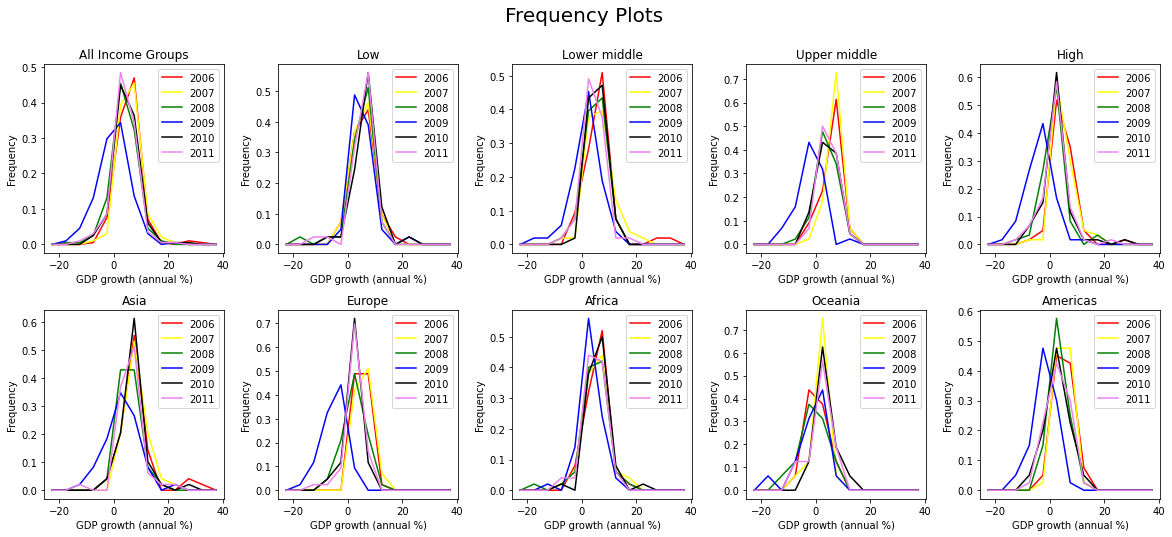

In [25]:
# YOUR CODE HERE

colors = ['red', 'yellow', 'green', 'blue', 'black', 'violet']
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Frequency Plots', fontsize=20)


# dla całości
ax[0, 0].set_title('All Income Groups')
for year, color in zip(years, colors):
    ax[0, 0].plot(intervals.mid, recession_table_1.loc[year], label=year, color=color)
ax[0, 0].set_xlabel('GDP growth (annual %)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].legend()

# dla grup dochodowych
for i, group in enumerate(groups):
    row = i // 5
    col = i % 5 + 1
    ax[row, col].set_title(group)
    for year, color in zip(years, colors):
        ax[row, col].plot(intervals.mid, recession_table_3.loc[group, year], label=year, color=color)
    ax[row, col].set_xlabel('GDP growth (annual %)')
    ax[row, col].set_ylabel('Frequency')
    ax[row, col].legend()

# dla regionów
for i, region in enumerate(regions):
    row = i // 5 + 1
    col = i % 5
    ax[row, col].set_title(region)
    for year, color in zip(years, colors):
        ax[row, col].plot(intervals.mid, recession_table_2.loc[region, year], label=year, color=color)
    ax[row, col].set_xlabel('GDP growth (annual %)')
    ax[row, col].set_ylabel('Frequency')
    ax[row, col].legend()

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


#### b) Inne typy wykresów
Bazując na wczytanych do notatnika danych przygotuj wykresy typu boxplot, violinplot, swarmplot i stripplot.

W przypadku każdego z typów wykresów zestaw wyniki na pojedynczej figurze (siatka wykresów 3x1). W górnym wierszu zawszyj wykres skonstruowany w oparciu o całość danych, w wierszu środkowym wykres zawierajacy podział na poszczególne stopnie zamożności, a w wierszu dolnym wykres zawierajacy podział na poszczególne rejony geograficzne. Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- na górnych wykresach dla całości danych użyj pojedynczego koloru jako wypełnienia,
- dla stopni zamożności ustaw jako wypełnienie skalę kolorów coolwarm,
- poszczególnym rejonom geograficznym przypisz jasne/wypłowiałe wersje kolorów przypisanych im na fladze olimpijskiej (Afryka szary, Europa jasnoniebieski itd.),
- w przypadku wykresów swarmplot i stripplot dobierz ich parametry tak by chmury punktów powiązanych z opisanymi w legendzie wariantami parametrów były rozdzielone,
- do dwóch dolnych wykresów dodaj legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym rejonom geograficznym/stopniom zamożności w taki sposób, aby nie zasłaniała znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

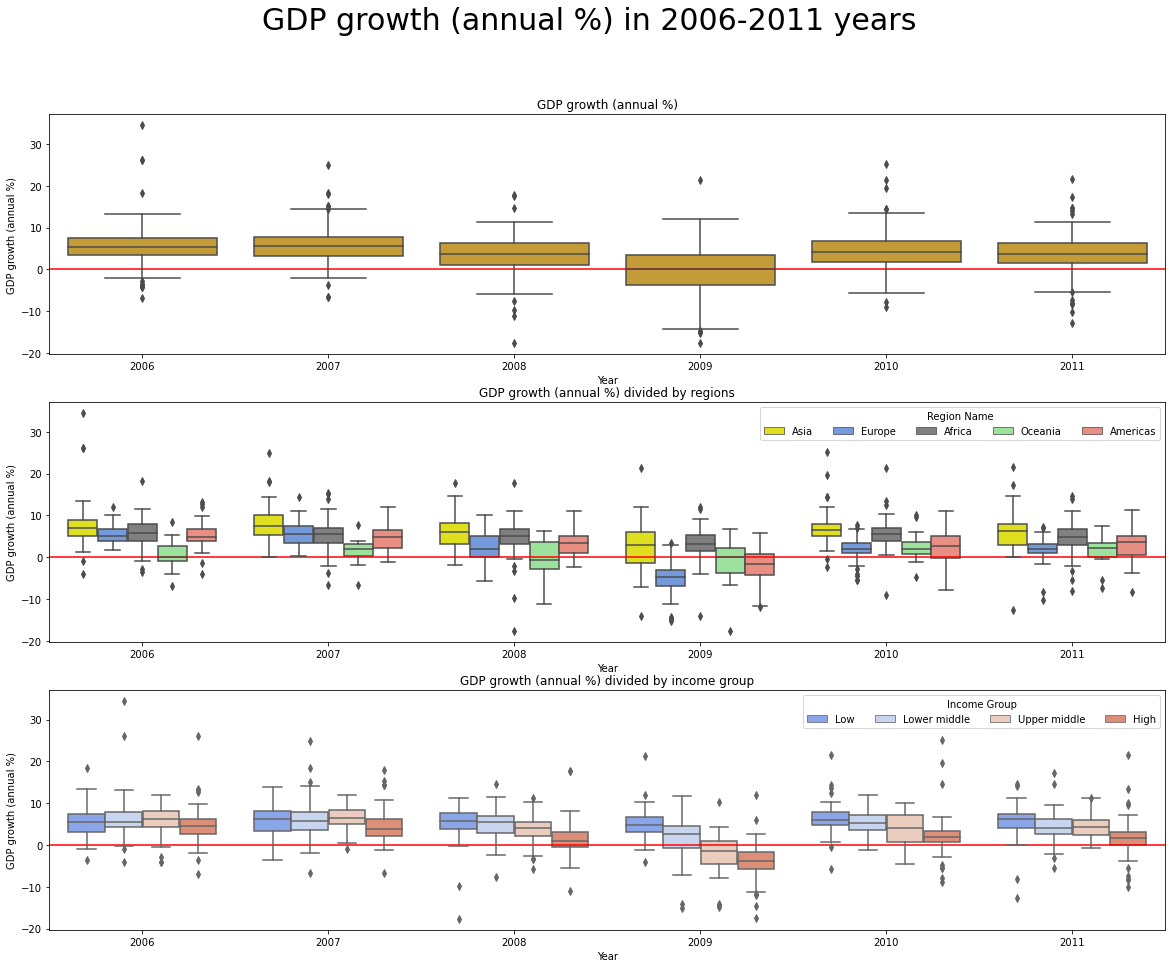

In [26]:
#Boxplot
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

fig.suptitle('GDP growth (annual %) in 2006-2011 years', fontsize=30)

#overall
plot_data = pd.melt(recession_data_1.drop(["Country Name", "Region Name", "Income Group"], axis=1),var_name="Year" , value_name="GDP growth (annual %)")
sns.boxplot(data=plot_data, x="Year", y="GDP growth (annual %)", color='goldenrod' ,ax=axs[0])
axs[0].set_title('GDP growth (annual %)')
axs[0].axhline(0, c="red", zorder=1)

plot_data = pd.melt(recession_data_1, value_vars=['2006', '2007', '2008','2009','2010','2011'], id_vars=["Income Group", 'Region Name'], var_name="Year", value_name="GDP growth (annual %)")

#regions
region_palette = {'Asia' : 'yellow', 'Europe': 'cornflowerblue', 'Africa': 'grey', 'Oceania': 'lightgreen', 'Americas': 'salmon'}
sns.boxplot(data=plot_data, x="Year", y="GDP growth (annual %)", hue="Region Name", palette=region_palette ,ax=axs[1])
sns.move_legend(axs[1], "upper right" ,ncol=5)
axs[1].set_title('GDP growth (annual %) divided by regions')
axs[1].axhline(0, c="red", zorder=1)

#income group
sns.boxplot(data=plot_data, x="Year", y="GDP growth (annual %)", hue="Income Group", palette='coolwarm',ax=axs[2])
sns.move_legend(axs[2], "upper right" ,ncol=5)
axs[2].set_title('GDP growth (annual %) divided by income group')
axs[2].axhline(0, c="red", zorder=1)

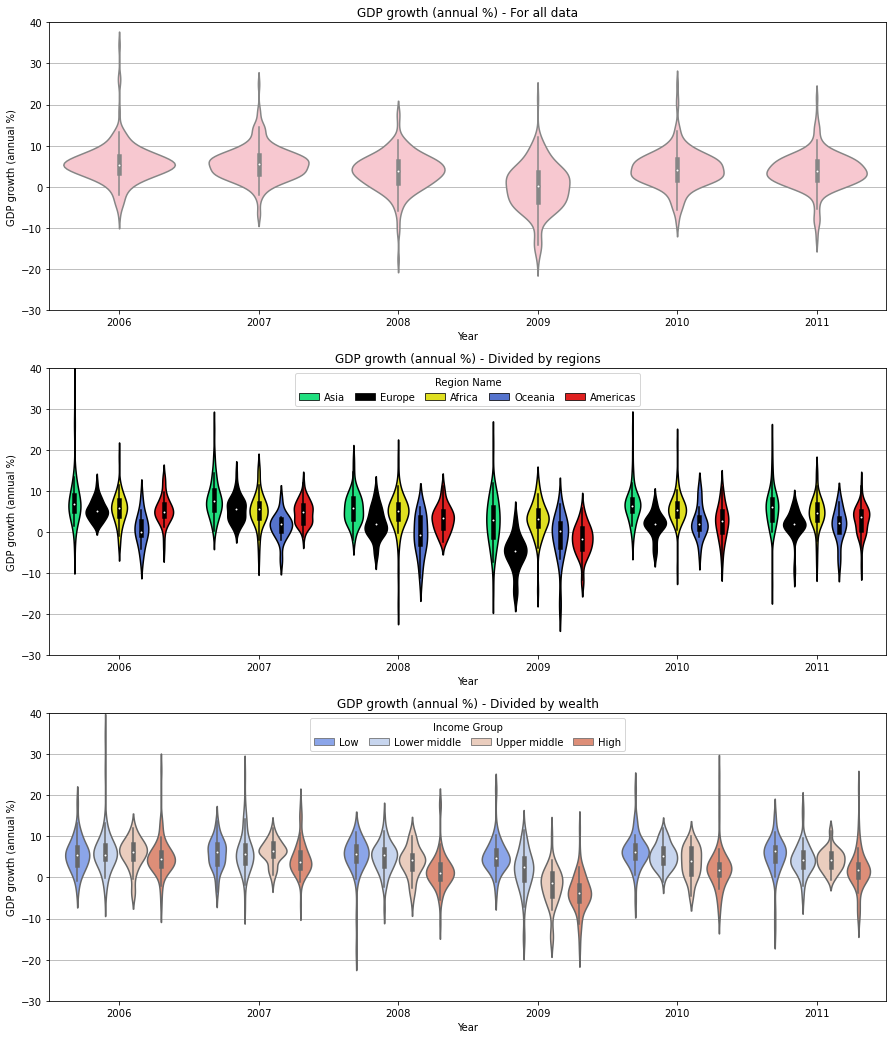

In [27]:
# Violinplot
region_colors = ["springgreen", "black", "yellow", "royalblue", "red"]
y_lim = [-30,40]
text_columns = ["Country Name", "Region Name", "Income Group"]
numeric_columns = ['2006', '2007', '2008','2009','2010','2011']
fig, axes = plt.subplots(3, 1, figsize=(15,18), facecolor="white")
plot_data = pd.melt(recession_data_1.drop(["Country Name", "Region Name", "Income Group"], axis=1), var_name="Year" , value_name="GDP growth (annual %)")
sns.violinplot(data=plot_data,  x="Year", y="GDP growth (annual %)", scale="area", color="pink", ax=axes[0], zorder=2)
axes[0].set_ylim(y_lim)
axes[0].grid(axis="y", zorder=0)
axes[0].set_axisbelow(True)
axes[0].set_title("GDP growth (annual %) - For all data");

plot_data = pd.melt(recession_data_1, id_vars = text_columns , value_vars=numeric_columns , var_name="Year" , value_name="GDP growth (annual %)")

sns.violinplot(data=plot_data, x="Year", y="GDP growth (annual %)", scale="area", hue="Region Name", palette=region_colors, ax=axes[1], zorder=2)
axes[1].set_ylim(y_lim)
axes[1].grid(axis="y", zorder=0)
axes[1].set_axisbelow(True)
axes[1].set_title("GDP growth (annual %) - Divided by regions");
sns.move_legend(axes[1], loc="upper center", ncol=5, frameon=True, columnspacing=1, handletextpad=0.5)

sns.violinplot(data=plot_data, x="Year", y="GDP growth (annual %)", scale="area", hue="Income Group", palette="coolwarm", ax=axes[2], zorder=2)
axes[2].set_ylim(y_lim)
axes[2].grid(axis="y", zorder=0)
axes[2].set_axisbelow(True)
axes[2].set_title("GDP growth (annual %) - Divided by wealth");
sns.move_legend(axes[2], loc="upper center", ncol=4, frameon=True, columnspacing=1, handletextpad=0.5)



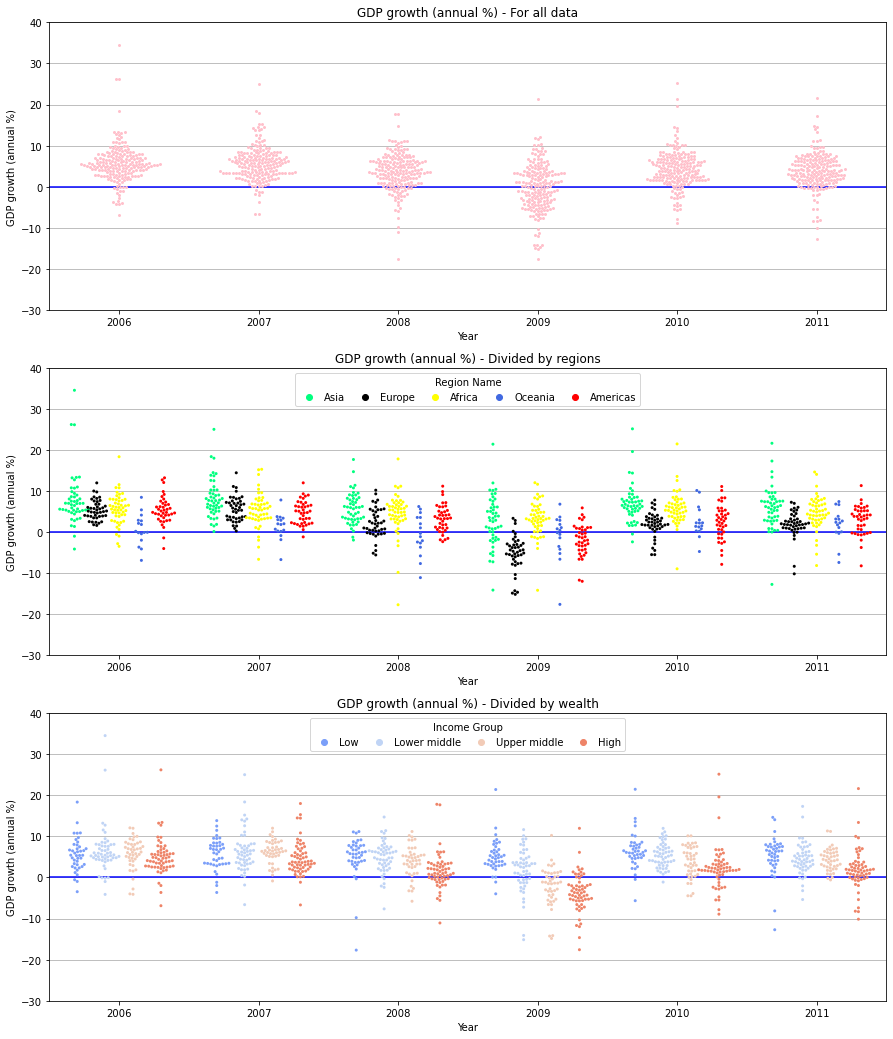

In [28]:
# Swarmplot
region_colors = ["springgreen", "black", "yellow", "royalblue", "red"]
#  Africa (yellow), the Americas (red), Asia (green), Europe (black), and Oceania (blue   azja  europa afryka oceania ameryka
y_lim = [-30,40]
text_columns = ["Country Name", "Region Name", "Income Group"]
numeric_columns = ['2006', '2007', '2008','2009','2010','2011']
fig, axes = plt.subplots(3, 1, figsize=(15,18), facecolor="white")
plot_data = pd.melt(recession_data_1.drop(["Country Name", "Region Name", "Income Group"], axis=1), var_name="Year" , value_name="GDP growth (annual %)")
sns.swarmplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, color="pink", ax=axes[0], zorder=2)
axes[0].set_ylim(y_lim)
axes[0].grid(axis="y", zorder=0)
axes[0].axhline(0, c="blue", zorder=1)
axes[0].set_axisbelow(True)
axes[0].set_title("GDP growth (annual %) - For all data");

plot_data = pd.melt(recession_data_1, id_vars = text_columns , value_vars=numeric_columns , var_name="Year" , value_name="GDP growth (annual %)")
sns.swarmplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, dodge=True, hue="Region Name", palette=region_colors, ax=axes[1], zorder=2)
axes[1].set_ylim(y_lim)
axes[1].grid(axis="y", zorder=0)
axes[1].axhline(0, c="blue", zorder=1)
axes[1].set_axisbelow(True)
axes[1].set_title("GDP growth (annual %) - Divided by regions");
sns.move_legend(axes[1], loc="upper center", ncol=5, frameon=True, columnspacing=1, handletextpad=0.5)

sns.swarmplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, dodge=True, hue="Income Group", palette="coolwarm", ax=axes[2], zorder=2)
axes[2].set_ylim(y_lim)
axes[2].grid(axis="y", zorder=0)
axes[2].axhline(0, c="blue", zorder=1)
axes[2].set_axisbelow(True)
axes[2].set_title("GDP growth (annual %) - Divided by wealth");
sns.move_legend(axes[2], loc="upper center", ncol=4, frameon=True, columnspacing=1, handletextpad=0.5)



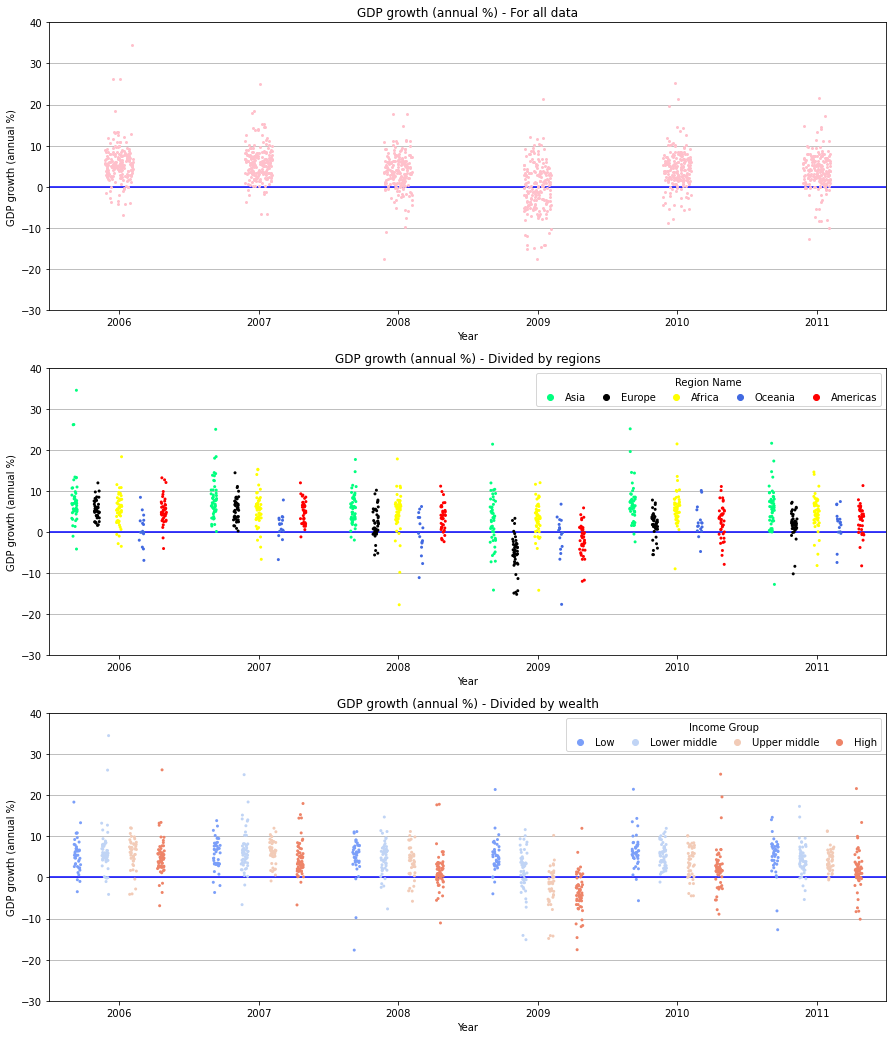

In [29]:
# Stripplot
region_colors = ["springgreen", "black", "yellow", "royalblue", "red"]
#  Africa (yellow), the Americas (red), Asia (green), Europe (black), and Oceania (blue   azja  europa afryka oceania ameryka
y_lim = [-30,40]
text_columns = ["Country Name", "Region Name", "Income Group"]
numeric_columns = ['2006', '2007', '2008','2009','2010','2011']
fig, axes = plt.subplots(3, 1, figsize=(15,18), facecolor="white")
plot_data = pd.melt(recession_data_1.drop(["Country Name", "Region Name", "Income Group"], axis=1), var_name="Year" , value_name="GDP growth (annual %)")
sns.stripplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, color="pink", ax=axes[0], zorder=2)
axes[0].set_ylim(y_lim)
axes[0].grid(axis="y", zorder=0)
axes[0].axhline(0, c="blue", zorder=1)
axes[0].set_axisbelow(True)
axes[0].set_title("GDP growth (annual %) - For all data");

plot_data = pd.melt(recession_data_1, id_vars = text_columns , value_vars=numeric_columns , var_name="Year" , value_name="GDP growth (annual %)")
sns.stripplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, dodge=True, hue="Region Name", palette=region_colors, ax=axes[1], zorder=2)
axes[1].set_ylim(y_lim)
axes[1].grid(axis="y", zorder=0)
axes[1].axhline(0, c="blue", zorder=1)
axes[1].set_axisbelow(True)
axes[1].set_title("GDP growth (annual %) - Divided by regions");
sns.move_legend(axes[1], loc="upper right", ncol=5, frameon=True, columnspacing=1, handletextpad=0.5)

sns.stripplot(data=plot_data,  x="Year", y="GDP growth (annual %)", size=3, dodge=True, hue="Income Group", palette="coolwarm", ax=axes[2], zorder=2)
axes[2].set_ylim(y_lim)
axes[2].grid(axis="y", zorder=0)
axes[2].axhline(0, c="blue", zorder=1)
axes[2].set_axisbelow(True)
axes[2].set_title("GDP growth (annual %) - Divided by wealth");
sns.move_legend(axes[2], loc="upper right", ncol=4, frameon=True, columnspacing=1, handletextpad=0.5)

#### c) Dyskusja wyników

Zastanów się jakie są mocne i słabe strony poszczególnych typów wykresów wykonanych w tym zadaniu. W jakich przypadkach wykorzystanie konkretnych typów wykresów do wizualizacji może sprawiać problemy?

Wykres typu boxplot jest zdecydowanie najbardziej zrozumiały dla osób mających obycie ze statystyką, gdyż w przejrzysty sposób można odczytać ważne parametry statystyczne. Dla laika może być jednak niezrozumiały.

Najlepszym do interpretacji jest moim zdaniem wykres typu swarmplot - jasno można zobaczyć rozkład chmury punktów i zobaczyć, gdzie jest ich największe zagęszczenie. Wykres skrzypcowy violinplot jest dość podobny, jednak dla osoby niezorientowanej mógłby być nie do końca czytelny, widać jednak na nim dobrze jak rozłożone są punkty. Wykres stripplot, podobnie jak swarmplot, jest dość czytelny i na pewno byłby lepszy dla dużych zbiorów danych. W porównaniu do swarmplot jednak, możemy tu zaobserwować nakładanie się punktów, co przy niedużym zbiorze (198 rekordów) jest zjawiskiem, które możemy spokojnie uniknąć wybierając swarmplot.